In [65]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

In [66]:
def generate_synthetic_dataset(n_samples=1000, n_features=5, n_clusters=3, random_state=42):
    # Generate numeric features
    X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

    # Create a DataFrame
    df = pd.DataFrame(X, columns=[f'numeric_feature_{i}' for i in range(n_features)])

    # Add categorical features
    df['category_1'] = np.random.choice(['A', 'B', 'C'], size=n_samples)
    df['category_2'] = np.random.choice(['X', 'Y', 'Z'], size=n_samples)

    # Add some noise to make it more realistic
    df['noise'] = np.random.normal(0, 0.1, n_samples)

    return df

# Generate the dataset
synthetic_data = generate_synthetic_dataset()

# Save the dataset to a CSV file
synthetic_data.to_csv('synthetic_clustering_data.csv', index=False)

print("Synthetic dataset generated and saved as 'synthetic_clustering_data.csv'")
synthetic_data

Synthetic dataset generated and saved as 'synthetic_clustering_data.csv'


,numeric_feature_0,numeric_feature_1,numeric_feature_2,numeric_feature_3,numeric_feature_4,category_1,category_2,noise
0,-1.785584,11.314696,5.715312,0.073993,-6.801198,B,Y,0.092091
1,-6.925810,-9.603320,9.352152,2.980777,3.065049,A,X,-0.004380
2,-5.060161,-7.885729,7.797216,2.545379,5.492319,C,Z,-0.109395
3,-0.857847,7.687454,6.483595,1.242428,-8.159547,A,Z,0.163762
4,-1.442999,8.055278,6.021883,2.878292,-7.483532,B,X,0.115346
...,...,...,...,...,...,...,...,...
995,-3.112521,7.427474,4.505611,1.813946,-7.848827,B,X,-0.135752
996,-5.798168,-7.842795,8.139596,1.948089,5.248916,B,Y,-0.036152
997,-3.126644,7.102183,5.036718,3.487687,-6.106544,A,X,0.286041
998,-2.467064,9.528875,5.844514,2.824524,-7.499991,B,Y,0.184067


In [67]:
# Load the data
data = pd.read_csv('synthetic_clustering_data.csv')
data

,numeric_feature_0,numeric_feature_1,numeric_feature_2,numeric_feature_3,numeric_feature_4,category_1,category_2,noise
0,-1.785584,11.314696,5.715312,0.073993,-6.801198,B,Y,0.092091
1,-6.925810,-9.603320,9.352152,2.980777,3.065049,A,X,-0.004380
2,-5.060161,-7.885729,7.797216,2.545379,5.492319,C,Z,-0.109395
3,-0.857847,7.687454,6.483595,1.242428,-8.159547,A,Z,0.163762
4,-1.442999,8.055278,6.021883,2.878292,-7.483532,B,X,0.115346
...,...,...,...,...,...,...,...,...
995,-3.112521,7.427474,4.505611,1.813946,-7.848827,B,X,-0.135752
996,-5.798168,-7.842795,8.139596,1.948089,5.248916,B,Y,-0.036152
997,-3.126644,7.102183,5.036718,3.487687,-6.106544,A,X,0.286041
998,-2.467064,9.528875,5.844514,2.824524,-7.499991,B,Y,0.184067


In [68]:
# Preprocess the data
def preprocess_data(df):
    # Identify numeric and categorical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns

    # Scale numeric features
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # Encode categorical features
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))

    return df

# Preprocess the data
preprocessed_data = preprocess_data(data)
preprocessed_data

,numeric_feature_0,numeric_feature_1,numeric_feature_2,numeric_feature_3,numeric_feature_4,category_1,category_2,noise
0,1.474128,0.943234,-0.313976,0.165420,-0.723042,1,1,0.851013
1,-0.197573,-1.492318,2.087701,0.925927,1.194375,0,0,-0.079484
2,0.409172,-1.292334,1.060861,0.812013,1.666093,2,2,-1.092404
3,1.775847,0.520902,0.193378,0.471120,-0.987025,0,2,1.542310
4,1.585544,0.563729,-0.111524,0.899114,-0.855647,1,0,1.075318
...,...,...,...,...,...,...,...,...
995,1.042583,0.490632,-1.112832,0.620647,-0.926639,1,0,-1.346628
996,0.169158,-1.287335,1.286959,0.655743,1.618790,1,1,-0.385938
997,1.037990,0.452757,-0.762103,1.058551,-0.588042,0,0,2.721739
998,1.252498,0.735305,-0.228654,0.885046,-0.858846,1,1,1.738159


In [70]:
# Perform clustering
n_clusters = 3  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init="auto")
cluster_labels = kmeans.fit_predict(preprocessed_data)

cluster_centers = kmeans.cluster_centers_

# Add cluster labels to the original dataframe
data['Cluster'] = cluster_labels
data

,numeric_feature_0,numeric_feature_1,numeric_feature_2,numeric_feature_3,numeric_feature_4,category_1,category_2,noise,Cluster
0,1.474128,0.943234,-0.313976,0.165420,-0.723042,1,1,0.851013,2
1,-0.197573,-1.492318,2.087701,0.925927,1.194375,0,0,-0.079484,1
2,0.409172,-1.292334,1.060861,0.812013,1.666093,2,2,-1.092404,1
3,1.775847,0.520902,0.193378,0.471120,-0.987025,0,2,1.542310,2
4,1.585544,0.563729,-0.111524,0.899114,-0.855647,1,0,1.075318,2
...,...,...,...,...,...,...,...,...,...
995,1.042583,0.490632,-1.112832,0.620647,-0.926639,1,0,-1.346628,2
996,0.169158,-1.287335,1.286959,0.655743,1.618790,1,1,-0.385938,1
997,1.037990,0.452757,-0.762103,1.058551,-0.588042,0,0,2.721739,2
998,1.252498,0.735305,-0.228654,0.885046,-0.858846,1,1,1.738159,2


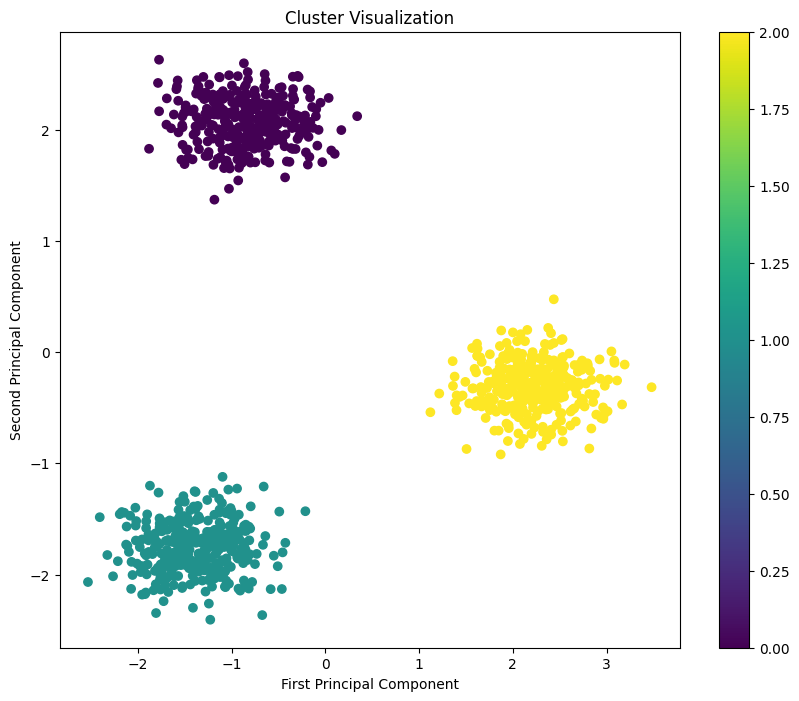

In [71]:
# Visualize the clusters (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(preprocessed_data)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('Cluster Visualization')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.savefig('cluster_visualization.png')
plt.show()
plt.close()

In [72]:
# Print results
print("Clustering Results:")
for index, row in data.iterrows():
    print(f"Index: {index}, Data point: {row.to_dict()}, Assigned Cluster: {row['Cluster']}")

print("\nCluster Centers:\n")
for i in range(len(cluster_centers)):
  print(i,": ",cluster_centers[i],"\n")

# Save results to a new CSV file
data.to_csv('clustering_results.csv', index=False)

print("Clustering complete. Results saved to 'clustering_results.csv' and visualization saved as 'cluster_visualization.png'.")

Clustering Results:
Index: 0, Data point: {'numeric_feature_0': 1.4741284463515592, 'numeric_feature_1': 0.9432339425490578, 'numeric_feature_2': -0.31397615506136395, 'numeric_feature_3': 0.16542027606395376, 'numeric_feature_4': -0.7230416145150486, 'category_1': 1.0, 'category_2': 1.0, 'noise': 0.851012707416771, 'Cluster': 2.0}, Assigned Cluster: 2.0
Index: 1, Data point: {'numeric_feature_0': -0.19757297045531005, 'numeric_feature_1': -1.492318284505478, 'numeric_feature_2': 2.0877007915827774, 'numeric_feature_3': 0.9259269032694383, 'numeric_feature_4': 1.1943749253865021, 'category_1': 0.0, 'category_2': 0.0, 'noise': -0.07948437192143143, 'Cluster': 1.0}, Assigned Cluster: 1.0
Index: 2, Data point: {'numeric_feature_0': 0.4091723987103568, 'numeric_feature_1': -1.2923336873888698, 'numeric_feature_2': 1.0608605963571411, 'numeric_feature_3': 0.8120131198758762, 'numeric_feature_4': 1.6660930032460246, 'category_1': 2.0, 'category_2': 2.0, 'noise': -1.0924038824297084, 'Cluster